In [ ]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re
from sklearn.metrics import silhouette_score 

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file = r'/content/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
data.project[8]

'Applied A* algorithm on a dynamic maze with moving obstacles given as a video to find a path from source to destination.'

In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True ,stop_words='english', min_df = 3  , max_df = 0.7 )
tfIdf = tfIdfVectorizer.fit_transform(new_corpus_customsp)
tfIdf

<628x1303 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

In [ ]:
matrix = tfIdf[:].toarray()
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25484288, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
strg = pd.DataFrame(matrix)
strg

0     1         2     3     4     5     ...  1297  1298  1299  1300  1301  1302
0     0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1     0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
2     0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3     0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4     0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
..    ...   ...       ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
623   0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
624   0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
625   0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
626   0.0   0.0  0.000000   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
627   0.0   0.0  0.254843   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0

[628 rows x 1303 columns]

In [ ]:
strg[:9]

0     1     2     3     4     5     ...  1297  1298  1299  1300  1301  1302
0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
2   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
5   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
6   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
7   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
8   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0

[9 rows x 1303 columns]

In [ ]:
strg[35][8]

0.27170924236392685

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(sf)
tfidf

<628x1303 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

In [ ]:
matrix = tfidf[:].toarray()
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25484288, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pd.DataFrame(matrix).head(100)

0     1     2     3         4     5     ...  1297  1298  1299  1300  1301  1302
0    0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1    0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
2    0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3    0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4    0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
..   ...   ...   ...   ...       ...   ...  ...   ...   ...   ...   ...   ...   ...
95   0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
96   0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
97   0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
98   0.0   0.0   0.0   0.0  0.196934   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
99   0.0   0.0   0.0   0.0  0.000000   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0

[100 rows x 1303 columns]

In [ ]:
# MEAN HO RHA HAI
weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df

ValueError: ignored

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
embedding_size = 100
window_size = 10
#min_word = 5
#down_sampling = 1e-2

In [ ]:
ft_model = FastText(tokenized_project,
                      size=embedding_size,
                      window=window_size,
                      #sg=1,
                      iter=100)

In [ ]:
ft_model.wv['machine']

array([-2.0187147 , -0.40363494,  0.52223915,  0.29115993,  1.0250467 ,
       -0.01670485, -0.6637501 ,  1.2775728 , -0.6698003 ,  1.5688646 ,
       -0.845086  , -1.7465805 , -1.6862615 ,  1.8624868 , -0.06922638,
       -0.5705119 , -0.20502643,  0.4847607 , -1.0702564 ,  1.4975195 ,
       -1.0687181 ,  0.7021416 , -0.68750226,  0.8733576 , -1.4700488 ,
       -1.080502  ,  0.5651494 ,  0.54672796,  0.16198035, -0.04818423,
       -0.48664433,  0.23350261,  1.8024544 , -0.5477351 , -0.8810152 ,
        1.7477528 ,  0.0529638 , -0.26206338, -1.0480976 , -0.28069267,
       -0.48563626,  1.3478321 , -1.4716902 ,  0.5423935 ,  1.1258427 ,
        0.4083838 , -1.1061189 ,  1.1779047 ,  0.39103624,  0.555031  ,
        0.97382593,  0.31468797, -0.36068726, -0.12099452,  0.5479079 ,
       -0.8499849 ,  0.9044505 , -0.93154055, -2.2813053 , -0.5375743 ,
        0.09649602, -1.3516998 ,  1.1645534 , -0.24853592,  0.9614796 ,
       -0.23686261,  0.26150626,  1.9070926 ,  0.41844377, -0.14

In [ ]:
ft_model['machine']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-2.0187147 , -0.40363494,  0.52223915,  0.29115993,  1.0250467 ,
       -0.01670485, -0.6637501 ,  1.2775728 , -0.6698003 ,  1.5688646 ,
       -0.845086  , -1.7465805 , -1.6862615 ,  1.8624868 , -0.06922638,
       -0.5705119 , -0.20502643,  0.4847607 , -1.0702564 ,  1.4975195 ,
       -1.0687181 ,  0.7021416 , -0.68750226,  0.8733576 , -1.4700488 ,
       -1.080502  ,  0.5651494 ,  0.54672796,  0.16198035, -0.04818423,
       -0.48664433,  0.23350261,  1.8024544 , -0.5477351 , -0.8810152 ,
        1.7477528 ,  0.0529638 , -0.26206338, -1.0480976 , -0.28069267,
       -0.48563626,  1.3478321 , -1.4716902 ,  0.5423935 ,  1.1258427 ,
        0.4083838 , -1.1061189 ,  1.1779047 ,  0.39103624,  0.555031  ,
        0.97382593,  0.31468797, -0.36068726, -0.12099452,  0.5479079 ,
       -0.8499849 ,  0.9044505 , -0.93154055, -2.2813053 , -0.5375743 ,
        0.09649602, -1.3516998 ,  1.1645534 , -0.24853592,  0.9614796 ,
       -0.23686261,  0.26150626,  1.9070926 ,  0.41844377, -0.14

In [ ]:
fasttext_word_word_matrix = ft_model.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [ ]:
#fasttext_word_word_matrix.shape()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.term[35]

'algorithm'

In [ ]:
weights_df[weights_df['term']=='algorithm'].index.item()

35

In [ ]:
strg[35][8]

0.27170924236392685

In [ ]:
weights_df.weight[35]

0.01619684174752801

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    num_word = 0
    for word in sent:
        try:
            if num_word == 0:
                sent_vec = model[word]
            else:
                weight_of_word = weights_df.weight[weights_df[weights_df['term']==word].index.item()]
                sent_vec = np.add(sent_vec , weight_of_word * model[word])
            num_word+=1
        except:
            pass
     
    return np.asarray(sent_vec) 

In [ ]:
data.project[8]

'Applied A* algorithm on a dynamic maze with moving obstacles given as a video to find a path from source to destination.'

In [ ]:
weights_df[weights_df['term']== "Applied"].index.item()

ValueError: ignored

In [ ]:
X=[]
for sentence in tokenized_project:
    X.append(sent_vectorizer(sentence, ft_model))   
 

print (X)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


[array([ 1.349566  ,  0.2655088 , -0.3933912 ,  2.6436996 ,  2.4051633 ,
       -0.10344885,  3.181901  ,  0.61396784, -2.022946  ,  2.1903176 ,
        0.75281024, -1.5263191 , -0.44034538,  0.62473   , -0.6267051 ,
        2.5901916 , -0.7620829 , -0.5345343 ,  2.7819395 , -0.17852448,
        2.0617652 , -3.6368773 , -1.5088671 ,  0.9655733 , -0.76483905,
       -1.1153723 , -1.8008585 ,  1.0924504 , -2.5749662 ,  0.78358144,
       -0.69179404, -0.32224604, -0.92162186,  1.0412109 , -0.17296173,
       -3.4477458 , -2.1688294 ,  1.089572  ,  0.49197844,  1.6163776 ,
       -3.4274163 ,  0.7365723 , -0.69251764,  0.14218059,  1.4930347 ,
       -2.8989296 , -0.02867333,  1.6704512 ,  1.2865033 ,  0.69590384,
       -1.590161  ,  0.96647435, -0.6640343 ,  2.4532516 ,  1.0394572 ,
        1.6286461 , -0.4586691 ,  0.1253645 ,  0.03812309, -0.7584984 ,
       -0.26813316, -1.2051452 ,  0.65256053, -0.02095595,  1.756047  ,
        0.86778855,  0.30019996, -0.07235467,  0.26203334, -1.5

In [ ]:
len(X)

628

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


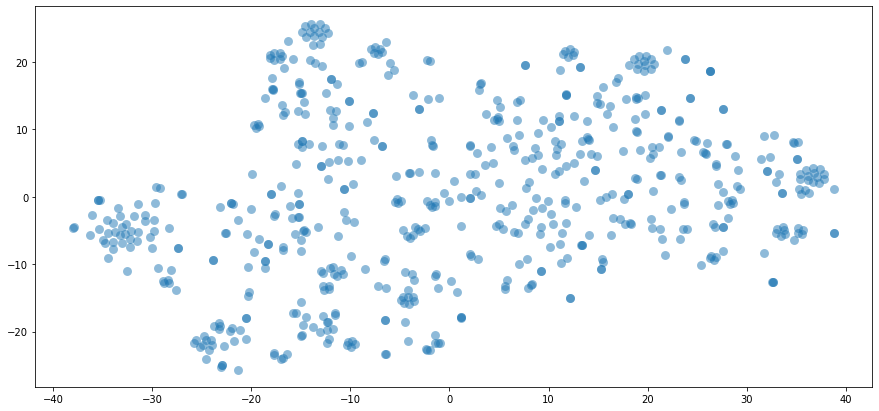

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(X, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


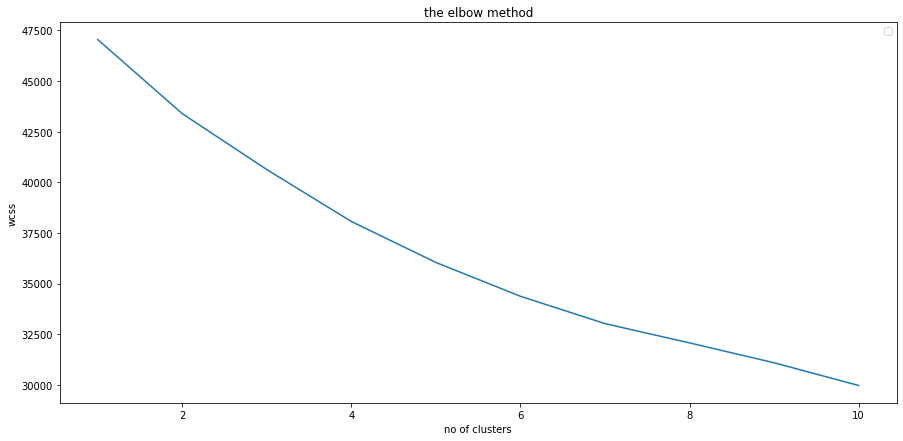

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 0 1 0 0 2 0 0 0 0 3 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 2 1 0 0 2 0 0 2
 2 0 1 2 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 2 1 3 3 3 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 0 1 0 0 1 0
 0 0 0 0 2 3 3 0 0 0 0 1 0 3 0 0 0 0 1 0 3 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 2
 0 3 3 3 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 2 0 0 0 1 3 3 3 3 3 0 0 0 0 1 3 0 0
 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 3 0
 3 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 1 3 0 0 0 3 3 2 2 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 2 0 0 3 0 0 0 0 2 1 1 1 3 0 1 0 3 3 1
 2 0 1 0 3 3 1 3 0 0 0 0 1 0 0 3 3 0 0 0 0 2 0 1 0 1 3 0 3 3 1 2 0 0 0 0 1
 0 2 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 3
 0 0 0 1 2 0 1 0 0 0 0 0 3 0 0 1 0 0 0 2 0 0 0 0 0 0 1 2 0 3 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

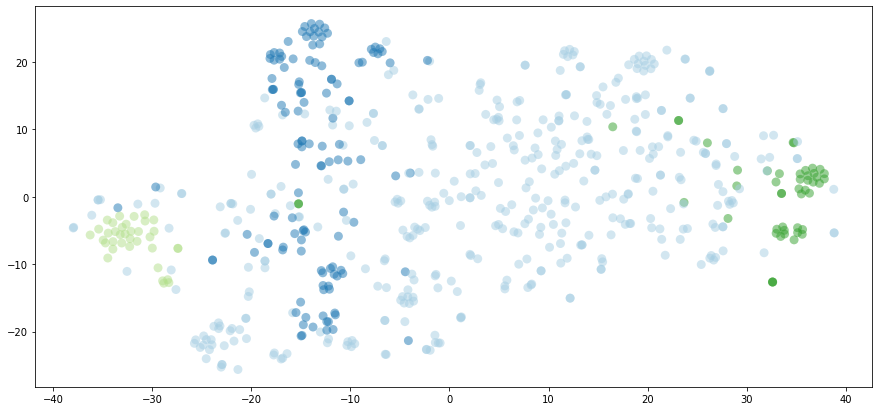

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[X] if X >= 0
                  else (0.5, 0.5, 0.5)
                  for X in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 
    

For no of clusters = 2  The average silhouette_score is : 0.066487424
For no of clusters = 3  The average silhouette_score is : 0.076323725
For no of clusters = 4  The average silhouette_score is : 0.1596607
For no of clusters = 5  The average silhouette_score is : 0.13185054
For no of clusters = 6  The average silhouette_score is : 0.089112036
For no of clusters = 7  The average silhouette_score is : 0.08333245
For no of clusters = 8  The average silhouette_score is : 0.09862794
For no of clusters = 9  The average silhouette_score is : 0.09702583
For no of clusters = 10  The average silhouette_score is : 0.10624972


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

421

In [ ]:
#projects in cluster 1
list1

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neur

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.head(100)

term    weight
0         ability  0.001230
1            able  0.006095
2        academic  0.002377
3   accelerometer  0.002114
4       according  0.002822
..            ...       ...
95            bus  0.002407
96       business  0.002960
97         buying  0.003255
98      calculate  0.002223
99     calculated  0.001860

[100 rows x 2 columns]

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 4
Frequency of steel is : 2
Frequency of cast is : 1
Frequency of limited is : 4
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 5
Frequency of peers is : 2
Frequency of fundamental is : 1
Frequency of analysis is : 65
Frequency of financial is : 14
Frequency of statements is : 2
Frequency of calculated is : 4
Frequency of relevant is : 10
Frequency of ratios is : 2
Frequency of evaluate is : 3
Frequency of status is : 3
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 12
Frequency of best is : 15
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of psnr is : 1
Frequency of currently is : 7
Frequency of drafting is : 2
Frequency of paperforthe is : 1
Frequency of algorithm is : 52
Frequency of reconstruction is : 5
Frequency of k is : 19
Frequency of space is : 6
Frequency of superresolution is : 1
Frequency of image

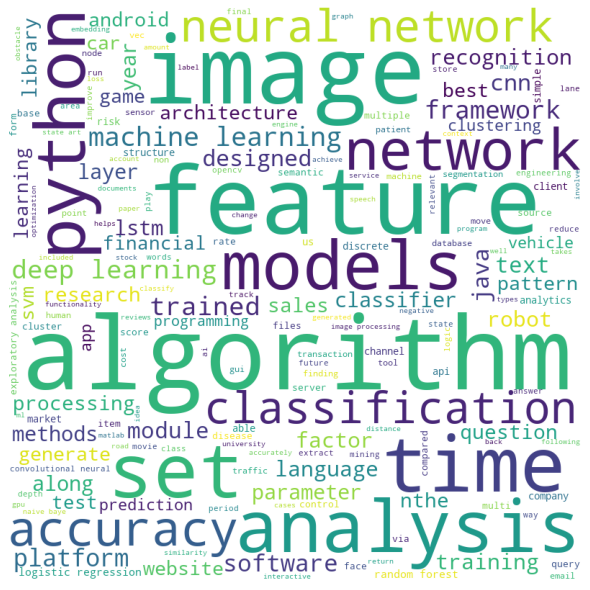

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

123

In [ ]:
list2

['accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy',
 'generated web scrapping glassdoor com unique features like job title salary estimate job company name exploratory analysis cleaning visualization feature engineering models predicting scientist salary algorithms linear regression decision tree random forest adaboost python accuracy',
 'bidirectional autoencoder extracted context nreference get softmax probabilities possible answers question extracted edges relations commonsense corporas like conceptnet nell making commonsense inclusive vectors relations extracted like conceptnet numberbatch nresearch areas natural language processing machine learning',
 'learnt machine learning life scenarios uci regression al

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
81            image  0.062349
180         trained  0.055647
113          neural  0.055220
111         network  0.054062
91         learning  0.049401
82           images  0.048173
24   classification  0.041577
2          accuracy  0.039615
41             deep  0.035695
138          python  0.034057
175            text  0.029816
26       classifier  0.029768
27         classify  0.029472
6        algorithms  0.028958
30              cnn  0.027909
88         language  0.027076
105          models  0.026936
57          feature  0.026435
172      tensorflow  0.025999
100            lstm  0.024517
101         machine  0.024162
112        networks  0.023719
177            time  0.022481
68         generate  0.022280
23          classes  0.020226
58         features  0.019263
11     architecture  0.019213
145     recognition  0.018972
134      prediction  0.018844
22            class  0.018814

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of accuracy is : 27
Frequency of solved is : 1
Frequency of time is : 10
Frequency of classification is : 28
Frequency of basis is : 3
Frequency of position is : 4
Frequency of camera is : 2
Frequency of flowneta is : 1
Frequency of optical is : 3
Frequency of flows is : 2
Frequency of frames is : 3
Frequency of ndetermine is : 1
Frequency of motion is : 2
Frequency of subject is : 1
Frequency of resnet is : 3
Frequency of top is : 7
Frequency of headlines is : 2
Frequency of date is : 1
Frequency of cleaning is : 2
Frequency of visualization is : 4
Frequency of predicting is : 7
Frequency of stock is : 2
Frequency of price is : 2
Frequency of news is : 3
Frequency of algorithms is : 15
Frequency of logistic is : 8
Frequency of regression is : 10
Frequency of random is : 7
Frequency of forest is : 6
Frequency of multinomial is : 3
Frequency of naive is : 3
Frequency of bayes is : 3
Frequency of python is : 16
Frequency of generated is : 5
Frequency of web is : 4
Frequency of 

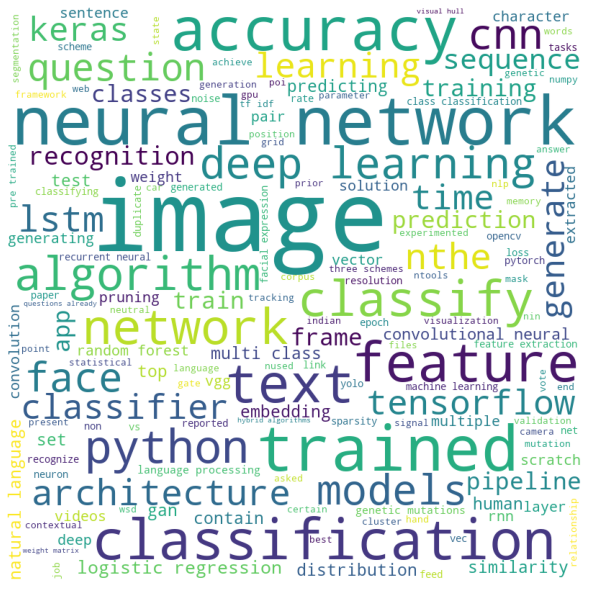

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

36

In [ ]:
list3

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'clustering categorise countries socio economic health factors finding countries need focus prepared cleaned adequate along treating outliers silhouette score elbow optimal clusters assign countries cluster ids segregate logical groups patterns',
 'shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'scraping module extract disease web newspapers last years instituted unsupervised classifier sentiment analyser categorize articles types effect reader temporal regional analysis extracted analyze progress suggest modification nhiv eradication campaign',
 'chunking maximum entropy models koe https www aclweb org anthology w pdf baseline selects chunk tag frequently associated nthe speech tag',
 'locating pun syntactic characteristics corpus metrics uwaterloo be

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
24       score  0.082187
13      models  0.075351
10    learning  0.072096
0    algorithm  0.067324
2     analysis  0.066964
20  predicting  0.065144
12     machine  0.063583
23      python  0.062146
14      module  0.059286
19         pre  0.053366
9      leading  0.051128
25      simple  0.050450
16     network  0.049732
22   providing  0.049568
21  prediction  0.048818
8       images  0.048688
7         html  0.048173
6     generate  0.045412
1   algorithms  0.045399
18         php  0.043815
15       mysql  0.043815
17      neural  0.042385
27       types  0.040899
11        like  0.038946
5     features  0.038862
3          art  0.038239
26       state  0.038239
4         deep  0.034914

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 3
Frequency of telecom is : 2
Frequency of firm is : 2
Frequency of predictive is : 1
Frequency of models is : 5
Frequency of risk is : 2
Frequency of churn is : 3
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 1
Frequency of generate is : 3
Frequency of tagging is : 1
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 2
Frequency of also is : 2
Frequency of strong is : 1
Frequency of clustering is : 2
Frequency of categorise is : 1
Frequency of countries is : 3
Frequency of socio is : 1
Frequency of economic is : 1
Frequency of health is : 1
Frequency of factors is : 2
Frequency of finding is : 2
Frequency of need is : 1
Frequency of focus is : 1
Frequency of prepared is : 1
Frequency of cleaned is : 1
Frequency of adequate is : 1
Frequency of along is : 1
Frequency of treating is : 1
Frequency of outliers is : 1
Frequency of silhouette is : 1
Frequency of score is : 

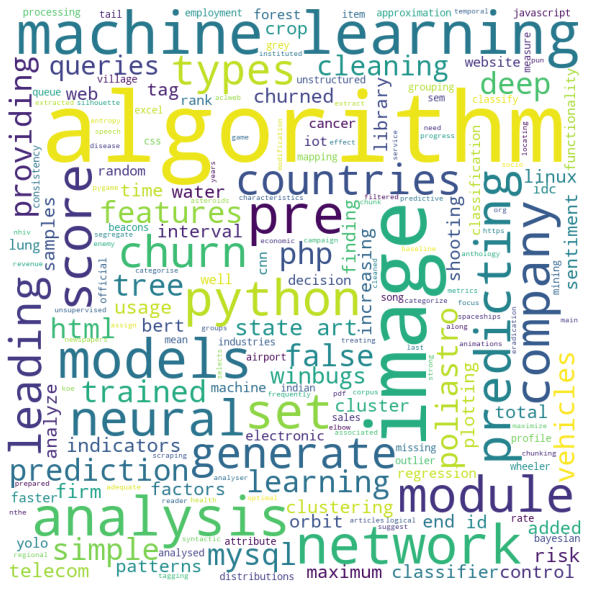

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

48

In [ ]:
list4

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accuracy disease ensemble models',
 'web handling waste disposal waste recycling distribution leverages sensor placed dustbins notify full infor nmation cloud iot clustering algorithm genetic algorithm fuzzy logic optimal path relative nto waste collection center collecting wastes filled dustbins priorities distance fuzzy logic path reduce cost distribution nof recycled materials',
 'android app driving collecting smart phone sensors like accelerometer g

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
3        android  0.142588
47       website  0.137476
5            app  0.127094
31        module  0.082410
23      learning  0.066783
46           web  0.060495
24          like  0.057112
4            api  0.056752
44          time  0.052853
21          java  0.050239
15           end  0.049583
2      algorithm  0.045651
41        server  0.045650
38        python  0.044502
39   recognition  0.036682
9     clustering  0.035332
25       machine  0.034995
30        mobile  0.031216
27           map  0.031046
13        degree  0.030529
19           iit  0.030422
45      training  0.029671
11   competition  0.029507
6   architecture  0.028720
28          maps  0.028664
48          yolo  0.027717
37         phone  0.027628
20         image  0.027466
10    collecting  0.027000
33          nano  0.024819

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 2
Frequency of duplication is : 1
Frequency of faces is : 2
Frequency of major is : 1
Frequency of challenges is : 1
Frequency of dup is : 1
Frequency of algorithm is : 6
Frequency of complexity is : 1
Frequency of means is : 3
Frequency of time is : 9
Frequency of get is : 2
Frequency of answer is : 2
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 1
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 1
Frequency of achieve is : 1
Frequency of tradeoff is : 1
Frequency of precision is : 2
Frequency of recall is : 1
Frequency of improves is : 1
Frequency of score is : 1
Frequency of machine is : 5
Frequency of learning is : 8
Frequency of collecting is : 4
Frequency of training is : 3
Frequency of end is : 8
Frequency of pipeline is : 1
Frequency of abnormalities is : 1
Frequency of chest is : 3
Frequency of x is : 3
Frequency of ray is : 3
Frequency of top is : 2
Freq

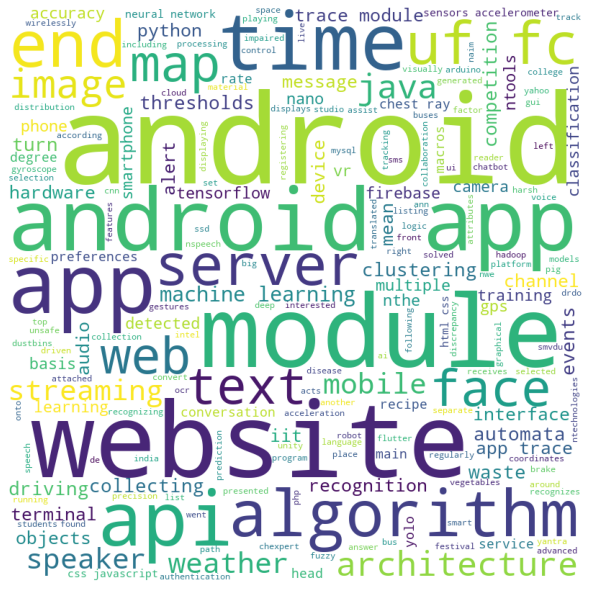

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 